spin-chain consists of N $1/2-spins/qubits$ in a magnetic field
Each spin interacts with neighbours


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (about, basis, expect, mesolve, qeye, sigmax, sigmay, sigmaz,
                   tensor)

%matplotlib inline

In [3]:
N = 5

state_list = [basis(2, 1)] + [basis(2, 0)] * (N - 1)
psi0 = tensor(state_list)

# energy splitting term
h = 2 * np.pi * np.ones(N)

# Interaction coefficients
Jx = 0.2 * np.pi * np.ones(N)
Jy = 0.2 * np.pi * np.ones(N)
Jz = 0.2 * np.pi * np.ones(N)

Energy splitting term for the interactions between spins and magnetic field

Each qubit has operator $\sigma_i$ - tensor product of identities and $\sigma_i$ at position in chain

In [4]:
# Setup operators for individual qubits
sx_list, sy_list, sz_list = [], [], []
for i in range(N):
    op_list = [qeye(2)] * N
    op_list[i] = sigmax()
    sx_list.append(tensor(op_list))
    op_list[i] = sigmay()
    sy_list.append(tensor(op_list))
    op_list[i] = sigmaz()
    sz_list.append(tensor(op_list))


# Hamiltonian energy splitting term
H = 0
for i in range(N):
    H -= 0.5 * h[i] * sz_list[i]

# Interaction terms
for n in range(N - 1):
    H += -0.5 * Jx[n] * sx_list[n] * sx_list[n + 1]
    H += -0.5 * Jy[n] * sy_list[n] * sy_list[n + 1]
    H += -0.5 * Jz[n] * sz_list[n] * sz_list[n + 1]

In [5]:
times = np.linspace(0, 100, 200)
result = mesolve(H, psi0, times, [], [])
# states to density matrix
states = [s * s.dag() for s in result.states]

c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\qutip\solver\solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


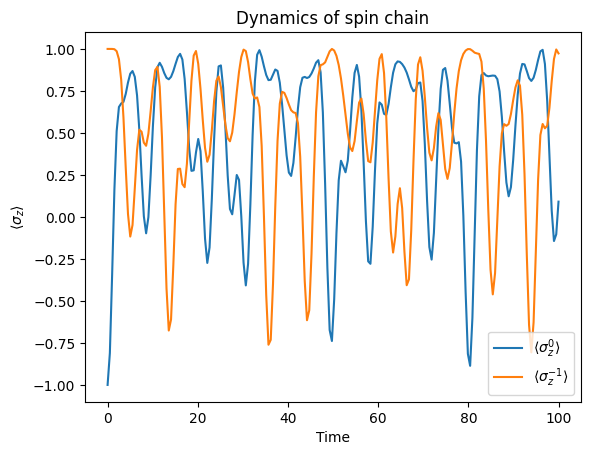

In [8]:
# Expectation value
exp_sz = np.array(expect(states, sz_list))

# Plot the expecation value
plt.plot(times, exp_sz[:, 0], label=r"$\langle \sigma_z^{0} \rangle$")
plt.plot(times, exp_sz[:, -1], label=r"$\langle \sigma_z^{-1} \rangle$")
plt.legend(loc="lower right")
plt.xlabel("Time"), plt.ylabel(r"$\langle \sigma_z \rangle$")
plt.title("Dynamics of spin chain");

Text(0.5, 1.0, 'Dynamics of spin chain with qubit dephasing')

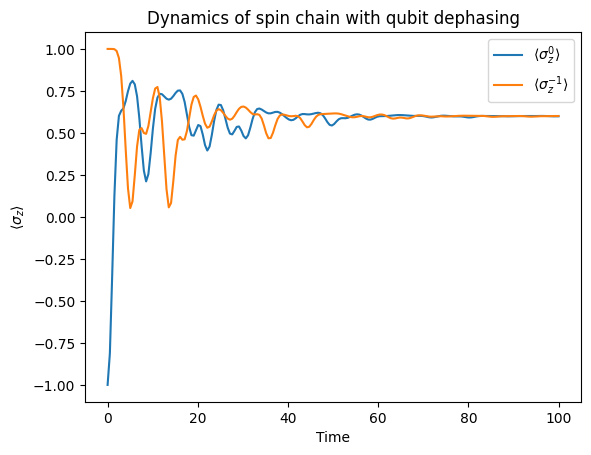

In [14]:
# dephasing rate
gamma = 0.02 * np.ones(N)

# collapse operators
c_ops = [np.sqrt(gamma[i]) * sz_list[i] for i in range(N)]

# evolution
result = mesolve(H, psi0, times, c_ops, [])

# expectation value
exp_sz_dephase = expect(sz_list, result.states)

# Plot expectation value
plt.plot(times, exp_sz_dephase[0], label=r"$\langle \sigma_z^{0} \rangle$")
plt.plot(times, exp_sz_dephase[-1], label=r"$\langle \sigma_z^{-1} \rangle$")
plt.legend()
plt.xlabel("Time"), plt.ylabel(r"$\langle \sigma_z \rangle$")
plt.title("Dynamics of spin chain with qubit dephasing")